Written by Gokmen Dedemen (gd1097)

In [19]:
import requests, zipfile,io
from io import StringIO
from zipfile import ZipFile
from urllib.request import urlopen
import pandas as pd
%pylab inline

#MY REFERENCE:
#https://stac koverflow.com/questions/9419162/python-download-returned-zip-file-from-url
def getData(datestring):
    
    #datestring="201501"
    zip_file_url=("https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
    r = requests.get(zip_file_url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall()
    df = pd.read_csv(z.open(datestring+'-citibike-tripdata.csv'))
    return df

Populating the interactive namespace from numpy and matplotlib


My reference for how to read csv file from a zip file (the code in the cell above)
https://stackoverflow.com/questions/9419162/python-download-returned-zip-file-from-url

## IDEA:

Subscribers are less likely than customers to take longer trip duration

### NULL HYPOTESIS (H0): 

The ratio of subscribers taking trips longer than the overall average of trip length, over subscribers taking shorter trips (that is, less than average trip length) is the same or higher than the ratio of customers taking trips longer than the overall average of trip length duration over customers taking shorter trips (that is, less than average trip length).

### ALTERNATIVE HYPOTESIS(HA):
The ratio of subscribers taking a trip longer than average duration over subscribers taking a trip shorter than average duration is lower than the ratio of subscribers taking a trip longer than average duration over subscribers taking a trip shorter than average duration.


I will use a significance level  $\alpha=0.05$
which means I want the probability of getting a result at least as significant as mine to be less then 5%


In [4]:
df=getData('201501')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [5]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [6]:
DF=df[['tripduration','usertype']]
DF['tripduration']=(DF['tripduration']/60) #to convert seconds to minutes

/Users/biancabrusco/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
DF.head()

,tripduration,usertype
0,22.433333,Subscriber
1,6.050000,Subscriber
2,5.766667,Subscriber
3,3.033333,Subscriber
4,16.150000,Subscriber


In [8]:
#checking the unique user types for citibike
DF.usertype.unique()

array(['Subscriber', 'Customer'], dtype=object)

In [9]:
#Since the mean value of trip duration of the users is 10.9 minutes, users whose trip takes above 11 minutes are considered as 
#users with longer trip duration
DF.describe()

,tripduration
count,285552.000000
mean,10.905426
std,15.012932
min,1.000000
25%,5.566667
50%,8.400000
75%,12.866667
max,717.050000


In [10]:
#Here we define a criteria for long and short trips and we create new columns for these in the form of boolean data
DF['longTrip']=DF['tripduration']>11
DF['shortTrip']=DF['tripduration']<=11

/Users/biancabrusco/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/biancabrusco/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
DF.head(20)

,tripduration,usertype,longTrip,shortTrip
0,22.433333,Subscriber,True,False
1,6.050000,Subscriber,False,True
2,5.766667,Subscriber,False,True
3,3.033333,Subscriber,False,True
4,16.150000,Subscriber,True,False
5,8.266667,Subscriber,False,True
6,2.533333,Subscriber,False,True
7,19.716667,Subscriber,True,False
8,14.100000,Subscriber,True,False
9,9.600000,Subscriber,False,True


In [12]:
#Divide subscribers and customers into two data set

df_subscribers=DF[DF.usertype=='Subscriber']
df_subscribers.head()

,tripduration,usertype,longTrip,shortTrip
0,22.433333,Subscriber,True,False
1,6.050000,Subscriber,False,True
2,5.766667,Subscriber,False,True
3,3.033333,Subscriber,False,True
4,16.150000,Subscriber,True,False


In [13]:
df_subscribers.usertype.unique() #check if it works, we should see only subscriber as a unique usertype

array(['Subscriber'], dtype=object)

In [14]:
df_customers=DF[DF.usertype=='Customer']
df_customers.head()

,tripduration,usertype,longTrip,shortTrip
24,20.850000,Customer,True,False
26,8.383333,Customer,False,True
28,19.583333,Customer,True,False
34,16.133333,Customer,True,False
38,14.383333,Customer,True,False


In [15]:
df_customers.usertype.unique() #check if it works, we should see only customer as a unique usertype

array(['Customer'], dtype=object)

In [16]:
counts_subscribers=df_subscribers.usertype.groupby([df_subscribers.longTrip]).count()
counts_subscribers

longTrip
False    189661
True      90263
Name: usertype, dtype: int64

In [17]:
counts_customers=df_customers.usertype.groupby([df_customers.longTrip]).count()
counts_customers

longTrip
False    1321
True     4307
Name: usertype, dtype: int64

In [18]:
counts_subscribers.sum()

279924

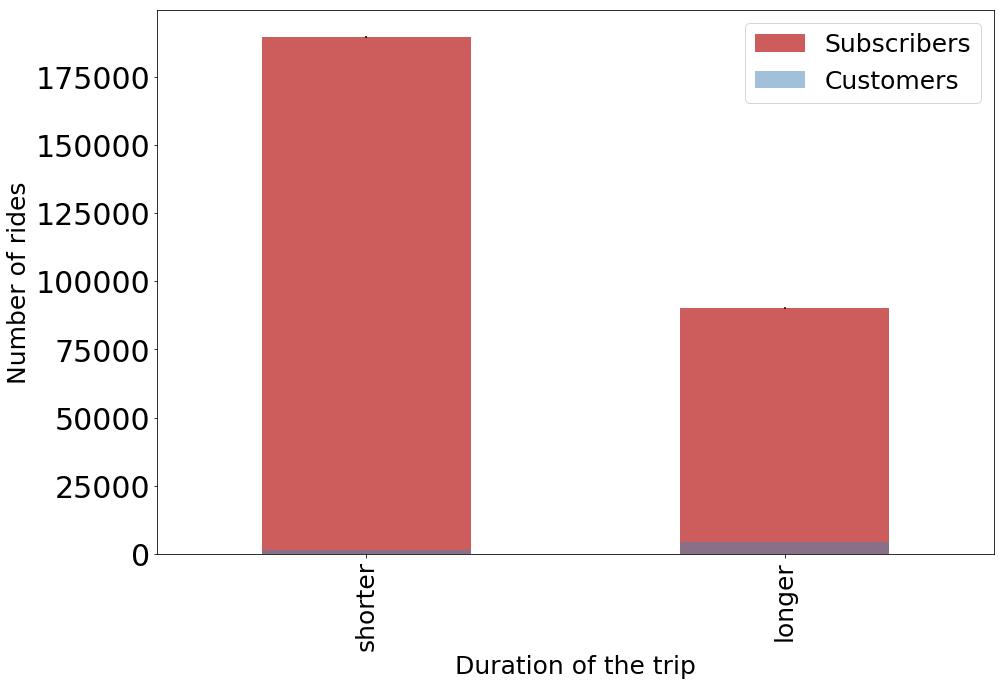

In [20]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

#What is the count of subscribers for long and short trips. Let us calculate it
counts_subscribers=df_subscribers.tripduration.groupby([df_subscribers.longTrip]).count()
norm_subscribers = 1
error_subscribers=np.sqrt(counts_subscribers)

((counts_subscribers) / norm_subscribers).plot(kind="bar",color='IndianRed', 
                                               yerr=[((error_subscribers)/ norm_subscribers, (error_subscribers) / norm_subscribers)],
                                               label = 'SteelBlue') 
                                               


# What is the count of customers for long and short trips. Let us calculate it.
counts_customers=df_customers.tripduration.groupby([df_customers.longTrip]).count()
norm_customers = 1
error_customers=np.sqrt(counts_customers)
ax=((counts_customers) / norm_customers).plot(kind="bar", alpha=0.5, label='Customers', yerr=[((error_customers) / norm_customers, (error_customers) / norm_customers)],
                                              color='SteelBlue')


plt.yticks(fontsize=30)
ax.xaxis.set_ticklabels(['shorter','longer'], fontsize=25)


ax.set_ylabel ("Number of rides", fontsize=25)
ax.set_xlabel ("Duration of the trip", fontsize=25)
plt.legend(['Subscribers','Customers'],fontsize=25)

** Figure 1 ** :Distribution of Citibike bikers by user type in January 2015, absolute counts, with statistical errors¶

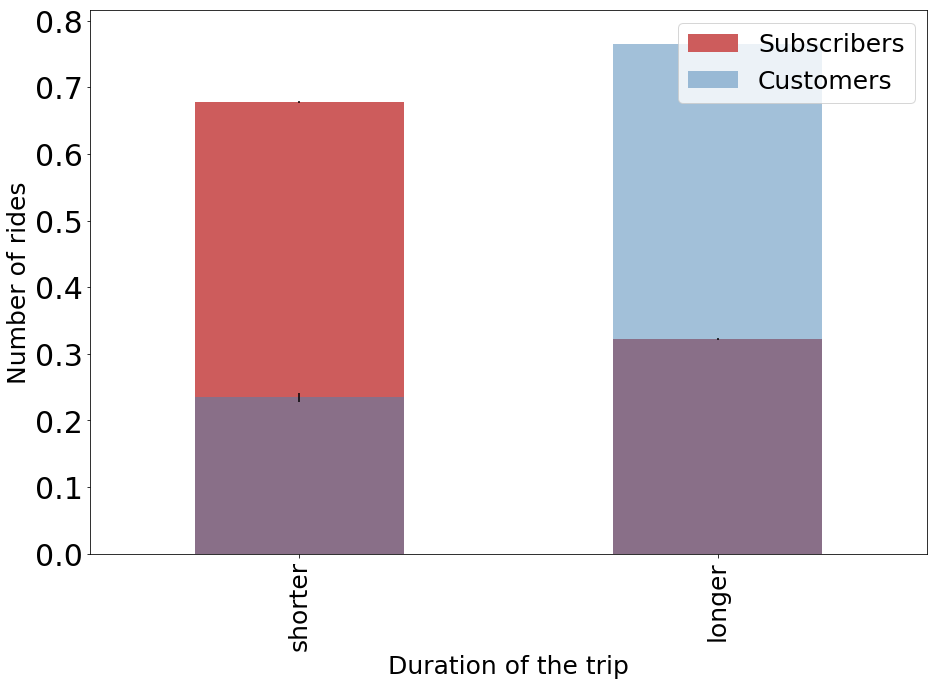

In [21]:
plt.figure(figsize=(15,10))


#What is the count of subscribers for long and short trips. Let us calculate it
counts_subscribers=df_subscribers.tripduration.groupby([df_subscribers.longTrip]).count()
norm_subscribers = counts_subscribers.sum()
error_subscribers=np.sqrt(counts_subscribers)

((counts_subscribers) / norm_subscribers).plot(kind="bar",color='IndianRed', 
                                               yerr=[((error_subscribers)/ norm_subscribers, (error_subscribers) / norm_subscribers)],
                                               label = 'SteelBlue') 
                                               


# What is the count of customers for long and short trips. Let us calculate it.
counts_customers=df_customers.tripduration.groupby([df_customers.longTrip]).count()
norm_customers = counts_customers.sum()
error_customers=np.sqrt(counts_customers)
ax=((counts_customers) / norm_customers).plot(kind="bar", alpha=0.5, label='Customers', yerr=[((error_customers) / norm_customers, (error_customers) / norm_customers)],
                                              color='SteelBlue')


plt.yticks(fontsize=30)
ax.xaxis.set_ticklabels(['shorter','longer'], fontsize=25)


ax.set_ylabel ("Number of rides", fontsize=25)
ax.set_xlabel ("Duration of the trip", fontsize=25)
plt.legend(['Subscribers','Customers'],fontsize=25)

** Figure 2 **: Distribution of Citibike bikers by user type in January 2015, normalized¶